<a href="https://colab.research.google.com/github/nidhicodes4045/datascience442/blob/main/Malik's_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports, Settings and Reading Dataset

In [ ]:
import time
t1 = time.perf_counter()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools


pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
print(os.getcwd())

/content


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nidhicodes4045/datascience442/refs/heads/main/merged_data.csv")

df = df.drop(['Unnamed: 0'], axis = 1).copy() # Dropping useless column

#Simple Understanding of the Data


*   Dataframe `shape` and `columns`
*   Column data `info`
*   Summary statistics
*   Unique values count







In [ ]:
df.shape

(3138, 67)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 67 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3138 non-null   object 
 1   Population                                                    3138 non-null   int64  
 2   State                                                         3138 non-null   object 
 3   mergedkeycol                                                  3138 non-null   object 
 4   Housing Data.Residing in Group Quarters                       3138 non-null   int64  
 5   Housing Data.Total Housing Units                              3138 non-null   int64  
 6   Vehicle Access.1 Mile                                         3138 non-null   int64  
 7   Vehicle Access.1/2 Mile                                       3138 no

In [ ]:
df.head()

,County,Population,State,mergedkeycol,Housing Data.Residing in Group Quarters,Housing Data.Total Housing Units,Vehicle Access.1 Mile,Vehicle Access.1/2 Mile,Vehicle Access.10 Miles,Vehicle Access.20 Miles,Low Access Numbers.Children.1 Mile,Low Access Numbers.Children.1/2 Mile,Low Access Numbers.Children.10 Miles,Low Access Numbers.Children.20 Miles,Low Access Numbers.Low Income People.1 Mile,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.Low Income People.10 Miles,Low Access Numbers.Low Income People.20 Miles,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Low Access Numbers.Seniors.1 Mile,Low Access Numbers.Seniors.1/2 Mile,Low Access Numbers.Seniors.10 Miles,Low Access Numbers.Seniors.20 Miles,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Housing.Homeownership Rate,Housing.Households,Housing.Housing Units,Housing.Median Value of Owner-Occupied Units,Housing.Persons per Household,Income.Median Houseold Income,Income.Per Capita Income,Miscellaneous.Foreign Born,Miscellaneous.Land Area,Miscellaneous.Language Other than English at Home,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Manufacturers Shipments,Miscellaneous.Mean Travel Time to Work,Miscellaneous.Percent Female,Miscellaneous.Veterans,Population.2020 Population,Population.2010 Population,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,autaugacounty,54571,al,autaugacountyal,455,20221,834,1045,222.0000,0,9973,13281,1199,0,12067,15518,2307,0,37424.0000,49497,5119,0,4393,5935.0000,707,0,16.0000,23.2000,5.9000,26.6000,88.5000,3350.0000,0.5000,1.2000,20.1000,3.0000,0.1000,1.9000,76.3000,73.8000,73.3000,21397.0000,23896.0000,154500.0000,2.5600,58731,29819,2.3000,594.4400,4.3000,87.9000,665897.0000,24.4000,51.5000,5272.0000,58805,54571,91.8000,93431.0000,607854.0000,2949,1093,1499,616.0000,2160,285,2401
1,baldwincounty,182265,al,baldwincountyal,2307,73180,1653,2178,32.0000,0,30633,38278,516,0,38848,48117,846,0,132442.0000,165616,2308,0,21828,27241.0000,390,0,21.0000,21.3000,5.4000,31.9000,90.8000,20047.0000,0.8000,1.1000,8.8000,4.7000,0.1000,1.9000,87.4000,83.2000,75.2000,80930.0000,119412.0000,197900.0000,2.5900,58320,32626,3.7000,1589.7800,5.4000,88.3000,1438760.0000,26.9000,51.5000,19663.0000,231767,182265,114.6000,560602.0000,3145789.0000,19732,6505,10935,2130.0000,16893,2364,16183
2,barbourcounty,27457,al,barbourcountyal,3193,9820,545,742,201.0000,0,3701,4943,791,0,9290,11901,2440,0,16444.5000,23762,4643,0,2537,3348.0000,629,0,19.7000,20.6000,5.3000,11.6000,73.2000,1329.0000,0.7000,0.5000,48.2000,4.5000,0.2000,1.2000,49.2000,45.5000,60.9000,9345.0000,12080.0000,90700.0000,2.4100,32525,18473,2.7000,884.8800,7.1000,85.5000,735098.0000,22.4000,47.1000,1328.0000,25223,27457,31.0000,26157.0000,206477.0000,1687,760,755,657.0000,941,147,1445
3,bibbcounty,22915,al,bibbcountyal,2224,7953,312,441,0.0000,0,4198,4824,90,0,6480,8349,102,0,17560.0000,20989,365,0,2262,2630.0000,72,0,16.7000,20.3000,5.6000,10.4000,79.1000,1101.0000,0.5000,0.2000,21.3000,2.8000,0.1000,1.2000,76.8000,74.4000,74.4000,6891.0000,9261.0000,92800.0000,2.9900,47542,20778,1.5000,622.5800,2.3000,89.7000,117488.0000,29.7000,46.7000,1433.0000,22293,22915,36.8000,10136.0000,118871.0000,1310,254,958,205.0000,1050,

Low Access Numbers.Low Income People.1/2 Mile

Low income population count at least 1/2 mile from supermarket

##filtering columns

In [ ]:
keep_columns = ['County', 'Population', 'State', 'mergedkeycol', 'Low Access Numbers.Low Income People.1/2 Mile', 'Low Access Numbers.People.1/2 Mile']
keep_columns.append("Education.Bachelor's Degree or Higher")
keep_columns.append("Education.High School or Higher")
keep_columns.append('Ethnicities.Black Alone')
keep_columns.append('Ethnicities.Hispanic or Latino')
keep_columns.append('Ethnicities.White Alone\t not Hispanic or Latino')
keep_columns.append('Ethnicities.Asian Alone')
keep_columns.append('Housing.Homeownership Rate')
keep_columns.append('Housing.Median Value of Owner-Occupied Units')
keep_columns.append('Income.Median Houseold Income')
keep_columns.append('Miscellaneous.Foreign Born')
keep_columns.append('Miscellaneous.Language Other than English at Home')
keep_columns.append('Population.Population per Square Mile')
keep_columns.append('Employment.Firms.Minority-Owned')
keep_columns.append('Employment.Firms.Nonminority-Owned')
keep_columns.append('Employment.Firms.Total')
df = df[keep_columns]

df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             3138 non-null   object 
 1   Population                                         3138 non-null   int64  
 2   State                                              3138 non-null   object 
 3   mergedkeycol                                       3138 non-null   object 
 4   Low Access Numbers.Low Income People.1/2 Mile      3138 non-null   int64  
 5   Low Access Numbers.People.1/2 Mile                 3138 non-null   int64  
 6   Education.Bachelor's Degree or Higher              3138 non-null   float64
 7   Education.High School or Higher                    3138 non-null   float64
 8   Ethnicities.Black Alone                            3138 non-null   float64
 9   Ethnicit

#Functions to Use

##compare_2_by_plot_scatter_matrix

In [ ]:
def compare_2_by_plot_scatter_matrix(col1, col2):
  plt.figure(figsize=(5, 4))  # Adjust figure size as needed
  plt.scatter(df[col1], df[col2])
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(f'Scatter Plot of {col1} vs {col2}')
  plt.grid(True)
  plt.show()

##Numerical_df

In [ ]:
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


In [ ]:
numerical_df = df.copy()
numerical_df.drop(['County', 'State', 'mergedkeycol'], axis = 1, inplace = True)

In [ ]:
numerical_df.head()

,Population,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,54571,15518,49497,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,182265,48117,165616,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,27457,11901,23762,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,22915,8349,20989,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,57322,19806,54933,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


#Asking Good Questions

##what is the average percentage of low income people amoung the population

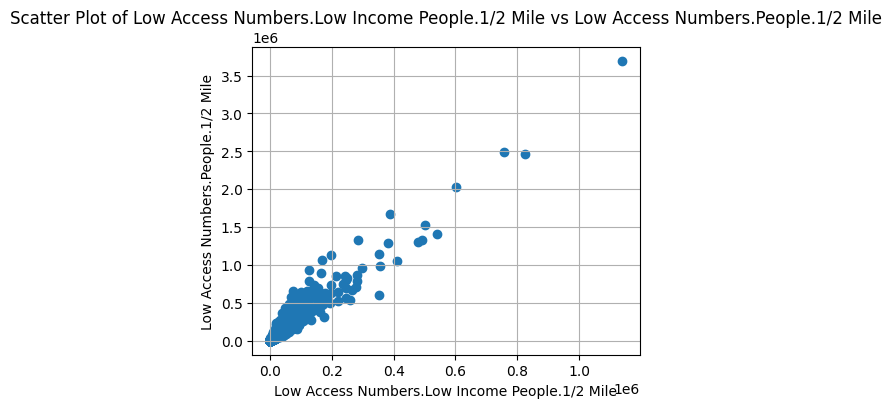

In [ ]:
compare_2_by_plot_scatter_matrix('Low Access Numbers.Low Income People.1/2 Mile', "Low Access Numbers.People.1/2 Mile")

Positive Correlation: There appears to be a positive correlation between the two variables. As the number of low-income people in a low-access area increases, the total number of people in that same area also tends to increase. This makes intuitive sense, as low-income individuals are part of the overall population.

##% of low income people

###adding "Percentage of Low Income People" column

In [ ]:
df["Percentage of Low Income People"] = df["Low Access Numbers.Low Income People.1/2 Mile"] / df["Low Access Numbers.People.1/2 Mile"]
df.insert(6, "Percentage of Low Income People", df.pop("Percentage of Low Income People"))
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,0.3135,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,0.2905,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,0.5008,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,0.3978,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,0.3605,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


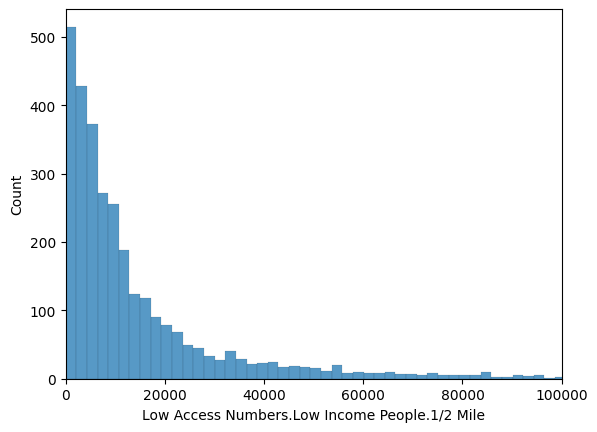

,Low Access Numbers.Low Income People.1/2 Mile
count,3138.0000
mean,20653.7368
std,48798.0220
min,0.0000
25%,3472.2500
50%,8403.5000
75%,19185.5000
max,1139072.0000


In [ ]:
sns.histplot(df['Low Access Numbers.Low Income People.1/2 Mile'])
plt.xlim(0, 100000)
plt.show()

df['Low Access Numbers.Low Income People.1/2 Mile'].describe()

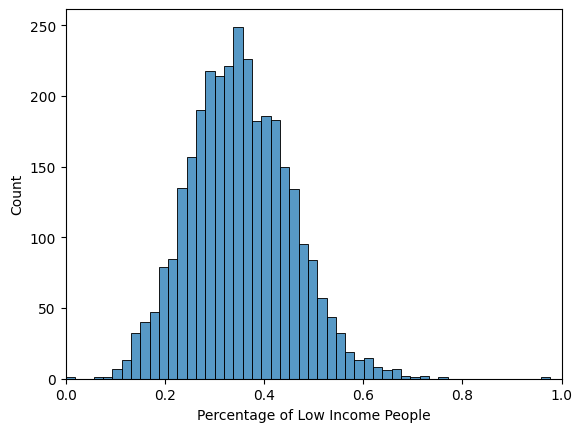

,Percentage of Low Income People
count,3138.0000
mean,0.3523
std,0.1023
min,0.0000
25%,0.2816
50%,0.3472
75%,0.4202
max,0.9768


In [ ]:
sns.histplot(df['Percentage of Low Income People'])
plt.xlim(0, 1)
plt.show()

df['Percentage of Low Income People'].describe()

# Exploratory Data Analysis

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis




## Univariate Analysis

---

*   Explore the distribution of each variable





###Histograms on each column

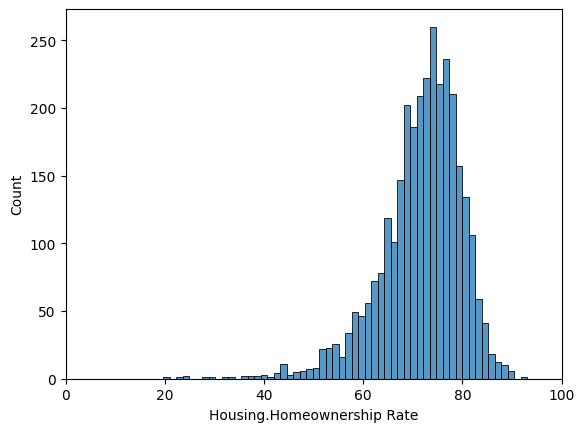

,Housing.Homeownership Rate
count,3138.0000
mean,71.6210
std,8.2445
min,19.7000
25%,67.5000
50%,72.9000
75%,77.2000
max,93.1000


In [ ]:
sns.histplot(df['Housing.Homeownership Rate']) #between 0-100
plt.xlim(0, 100)
plt.show()
df['Housing.Homeownership Rate'].describe()

this shows that homeownership rate is mostly around 70%

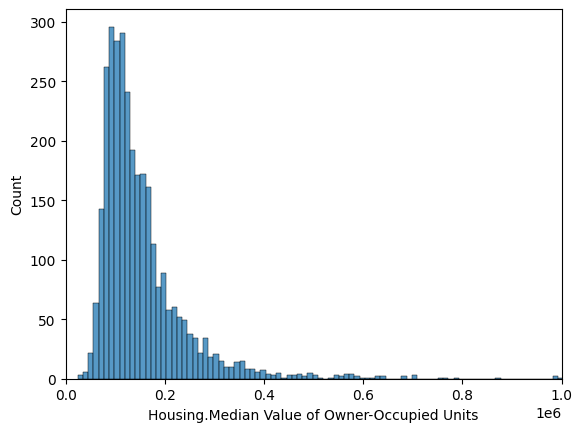

,Housing.Median Value of Owner-Occupied Units
count,3138.0000
mean,153773.2632
std,95382.4819
min,24400.0000
25%,97800.0000
50%,127900.0000
75%,174900.0000
max,1097800.0000


In [ ]:
sns.histplot(df['Housing.Median Value of Owner-Occupied Units'])
plt.xlim(0, 1000000)
plt.show()
df['Housing.Median Value of Owner-Occupied Units'].describe()

150k is the mean

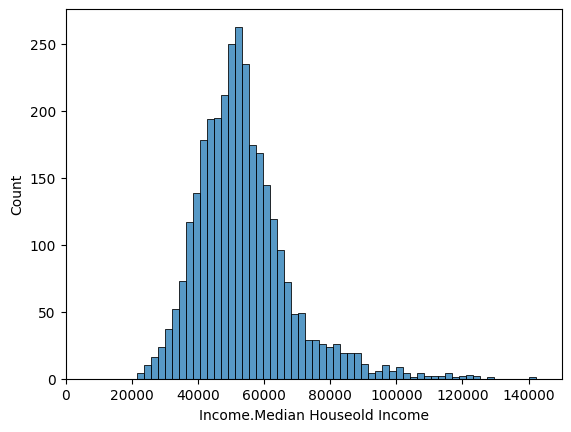

,Income.Median Houseold Income
count,3138.0000
mean,53483.6574
std,14183.6740
min,21504.0000
25%,44173.0000
50%,51770.0000
75%,59867.2500
max,142299.0000


In [ ]:
sns.histplot(df['Income.Median Houseold Income'])
plt.xlim(0, 150000)
plt.show()
df['Income.Median Houseold Income'].describe()

mean household income is 53k

In [ ]:
df.describe()

,Population,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
count,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000,3138.0000
mean,98312.8184,20653.7368,68507.6179,0.3523,21.9802,86.9543,9.3720,9.7550,75.8556,1.5776,71.6210,153773.2632,53483.6574,4.7674,9.5591,259.4281,2534.6883,6128.6740,9012.9790
std,313127.8717,48798.0220,164237.4583,0.1023,9.5709,6.2576,14.4483,13.8324,20.1266,2.9530,8.2445,95382.4819,14183.6740,5.7329,11.6725,1725.4740,17158.9149,17747.2916,34189.3716
min,82.0000,0.0000,82.0000,0.0000,0.0000,26.4000,0.1000,0.6000,2.7000,0.1000,19.7000,24400.0000,21504.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,11127.0000,3472.2500,9529.0000,0.2816,15.4000,83.4000,0.9000,2.5000,64.1250,0.5000,67.5000,97800.0000,44173.0000,1.4000,2.9000,17.0000,41.0000,729.0000,895.2500
50%,25890.0000,8403.5000,22554.5000,0.3472,19.6000,88.3000,2.6000,4.5000,83.2000,0.8000,72.9000,127900.0000,51770.0000,2.7000,5.3000,45.2000,165.0000,1707.0000,2069.0000
75%,66780.0000,19185.5000,57185.0000,0.4202,26.0000,91.5000,10.9000,10.1000,92.1000,1.4750,77.2000,174900.0000,59867.2500,5.7000,11.1000,113.9750,650.2500,4443.7500,5267.7500
max,9818605.0000,1139072.0000,3696268.0000,0.9768,77.6000,98.9000,86.6000,96.4000,97.8000,43.4000,93.1000,1097800.0000,142299.0000,53.7000,95.2000,69467.5000,631218.0000,481643.0000,1146701.0000


### check skewness for all columns,

skewness is between 0 and 1


In [ ]:
right_skewed = []
left_skewed = []
relative = []
def check_skewness(df):
    for column in df.columns:
        # Check if the column is numeric before calculating skewness
        if pd.api.types.is_numeric_dtype(df[column]):
            skewness = df[column].skew().round(2)
            if skewness >= 1:
                right_skewed.append(column)
                print(f"'{column}' is right-skewed (skewness: {skewness})")
            elif skewness <= -1:
                left_skewed.append(column)
                print(f"'{column}' is left-skewed (skewness: {skewness})")
            else:
                relative.append(column)
                print(f"'{column}' is relatively symmetric (skewness: {skewness})")
        else:
            print(f"Skipping non-numeric column: '{column}'")
check_skewness(numerical_df)
print("\nRight (positive) skewed columns:", right_skewed)
print("Left (negative) skewed columns:", left_skewed)
print("Relatively symmetric columns:", relative)

'Population' is right-skewed (skewness: 14.35)
'Low Access Numbers.Low Income People.1/2 Mile' is right-skewed (skewness: 9.9)
'Low Access Numbers.People.1/2 Mile' is right-skewed (skewness: 8.73)
'Education.Bachelor's Degree or Higher' is right-skewed (skewness: 1.44)
'Education.High School or Higher' is left-skewed (skewness: -1.31)
'Ethnicities.Black Alone' is right-skewed (skewness: 2.27)
'Ethnicities.Hispanic or Latino' is right-skewed (skewness: 3.04)
'Ethnicities.White Alone	 not Hispanic or Latino' is left-skewed (skewness: -1.18)
'Ethnicities.Asian Alone' is right-skewed (skewness: 7.07)
'Housing.Homeownership Rate' is left-skewed (skewness: -1.19)
'Housing.Median Value of Owner-Occupied Units' is right-skewed (skewness: 3.54)
'Income.Median Houseold Income' is right-skewed (skewness: 1.31)
'Miscellaneous.Foreign Born' is right-skewed (skewness: 2.89)
'Miscellaneous.Language Other than English at Home' is right-skewed (skewness: 2.84)
'Population.Population per Square Mile' is

Right-Skewed (Positive Skewness):

- 'Population' (skewness: 14.35) and 'Population.Population per Square Mile' (skewness: 26.91): Population distributions are very often right-skewed. Most geographic units (e.g., census tracts, counties) will have relatively lower populations, while a few, especially in urban centers, will have very high populations, pulling the mean to the right. Population density follows a similar pattern. The high skewness values here indicate a significant concentration in lower values with some very high outliers.
- 'Low Access Numbers.Low Income People.1/2 Mile' (skewness: 9.9) and 'Low Access Numbers.People.1/2 Mile' (skewness: 8.73): It's expected that most areas will have relatively low numbers of people living in low-access zones. A smaller number of areas might have significantly higher numbers, leading to a right-skewed distribution.
- 'Education.Bachelor's Degree or Higher' (skewness: 1.44): While a significant portion of the population may have some college education, the percentage with a Bachelor's degree or higher might be concentrated at lower to mid-levels, with fewer areas having extremely high percentages, resulting in a right skew.
- 'Ethnicities.Black Alone' (skewness: 2.27) and 'Ethnicities.Hispanic or Latino' (skewness: 3.04): The distribution of specific racial and ethnic groups is often geographically concentrated. Many areas might have relatively small populations of these groups, while a smaller number of areas will have larger concentrations, leading to a right skew.
- 'Housing.Median Value of Owner-Occupied Units' (skewness: 3.54): Housing values tend to be right-skewed. Many properties will fall within a lower to mid-price range, while a smaller number of high-value properties will pull the mean to the right.
- 'Income.Median Household Income' (skewness: 1.31): Income distributions are typically right-skewed. A larger portion of households will have incomes in the lower to middle ranges, with fewer households having very high incomes, pulling the mean upwards.
- 'Miscellaneous.Foreign Born' (skewness: 2.89) and 'Miscellaneous.Language Other than English at Home' (skewness: 2.84): These characteristics are often concentrated in specific geographic areas (e.g., urban centers, immigrant communities). Many areas might have a low percentage of foreign-born residents or households where a language other than English is spoken, while a smaller number of areas will have higher percentages, resulting in a right skew.
- 'Employment.Firms.Minority-Owned' (skewness: 22.08), 'Employment.Firms.Nonminority-Owned' (skewness: 11.56), and 'Employment.Firms.Total' (skewness: 16.7): The number of businesses is likely to be highly concentrated in commercial and urban areas. Most smaller, more rural areas will have fewer firms, while larger economic hubs will have a much greater number, leading to a strong right skew. The higher skewness for minority-owned firms could indicate even greater concentration in specific areas.

Left-Skewed (Negative Skewness):
- 'Ethnicities.White Alone not Hispanic or Latino' (skewness: -1.18): If other racial and ethnic groups are right-skewed due to concentration, then the 'White Alone not Hispanic or Latino' population might be more evenly distributed or concentrated in areas where other groups are less prevalent, leading to a left skew. This suggests that there are fewer areas with a very low percentage of this group, and more areas with a higher percentage.
- 'Housing.Homeownership Rate' (skewness: -1.19): Homeownership rates tend to be high in many suburban and rural areas. Left skewness suggests that there are fewer areas with very low homeownership rates (which are typically found in dense urban rental markets), and more areas with higher homeownership rates, pulling the mean to the left.

Relatively Symmetric Columns:
The fact that there are no columns listed as relatively symmetric suggests that most of the variables examined have some degree of skewness, which is common in real-world datasets, especially for socioeconomic and demographic indicators.

## Bivariate Analysis

---



*   Explore the relationship between two variables



In [ ]:
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,0.3135,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,0.2905,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,0.5008,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,0.3978,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,0.3605,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


###Low income vs ethnicity

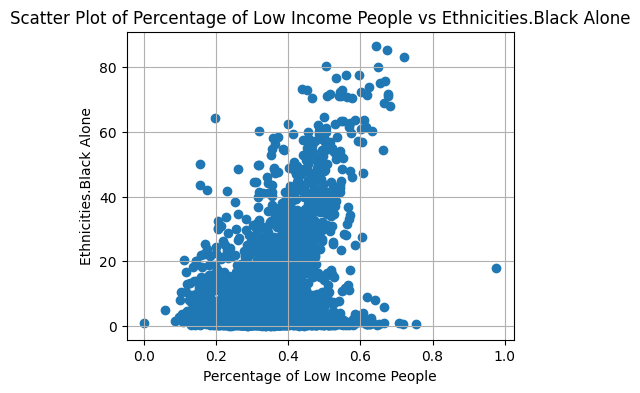

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', 'Ethnicities.Black Alone')

The plot suggests that in many areas, a higher proportion of the population identifying as Black alone is associated with a higher proportion of the population classified as low-income. However, this relationship isn't absolute, and there are areas with high Black populations that don't have the highest rates of low income, and vice versa.

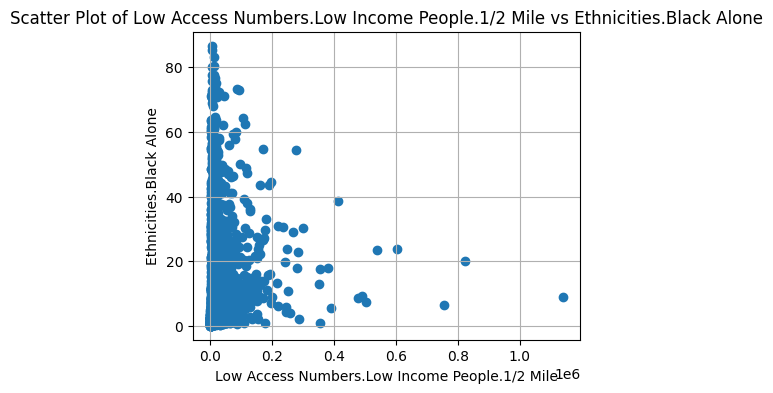

In [ ]:
compare_2_by_plot_scatter_matrix('Low Access Numbers.Low Income People.1/2 Mile', 'Ethnicities.Black Alone')

The plot suggests that while many areas with a small number of low-income individuals have varying percentages of the Black alone population, areas with a large number of low-income individuals tend to have a lower percentage of the population identifying as Black alone. However, it's crucial to note that this is a general tendency and not a definitive rule. There are still areas with significant numbers of low-income individuals that also have notable Black populations.

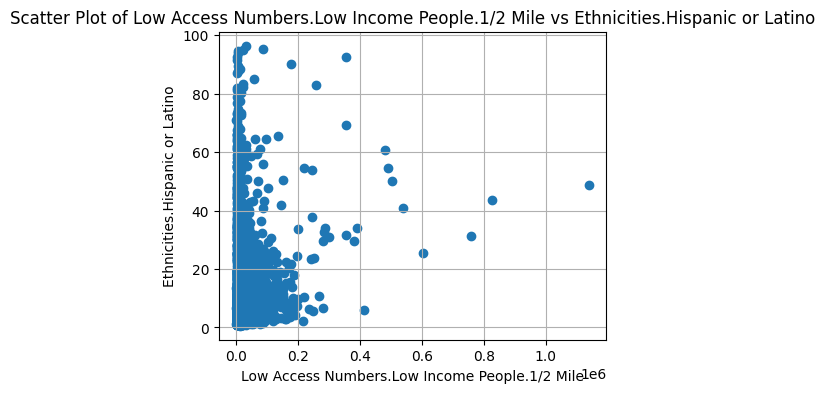

In [ ]:
compare_2_by_plot_scatter_matrix('Low Access Numbers.Low Income People.1/2 Mile', 'Ethnicities.Hispanic or Latino')

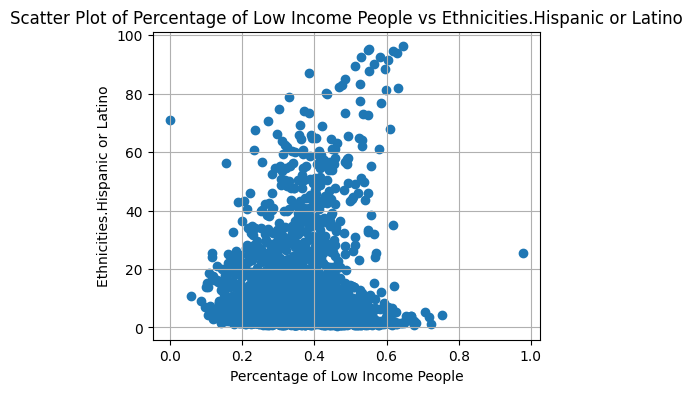

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', 'Ethnicities.Hispanic or Latino')

Looks very similar to the Black chart

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


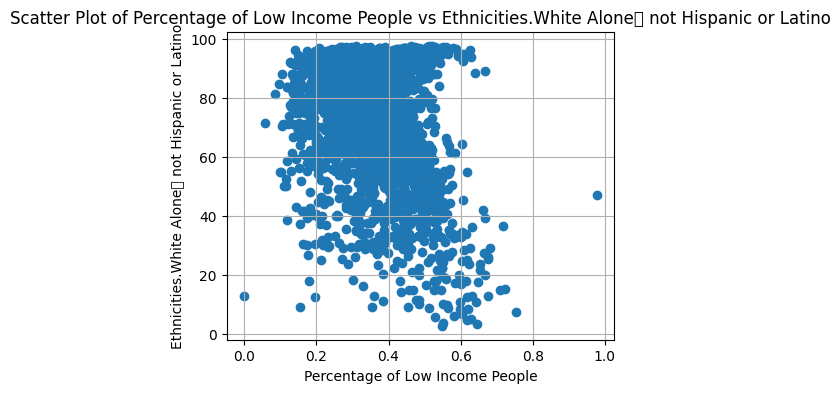

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', 'Ethnicities.White Alone\t not Hispanic or Latino')

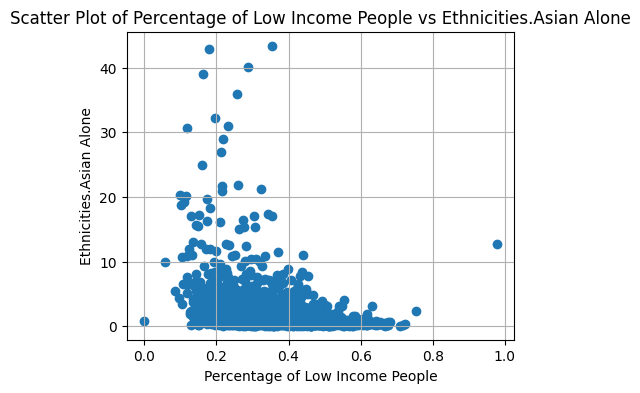

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', 'Ethnicities.Asian Alone')

The plot suggests that while areas with a lower percentage of low-income people can have a wide range in their Asian population, areas with a higher percentage of low-income people tend to have a lower percentage of the population identifying as Asian alone. However, this is a general observation and not a strict rule, as there are exceptions.

###low income vs education

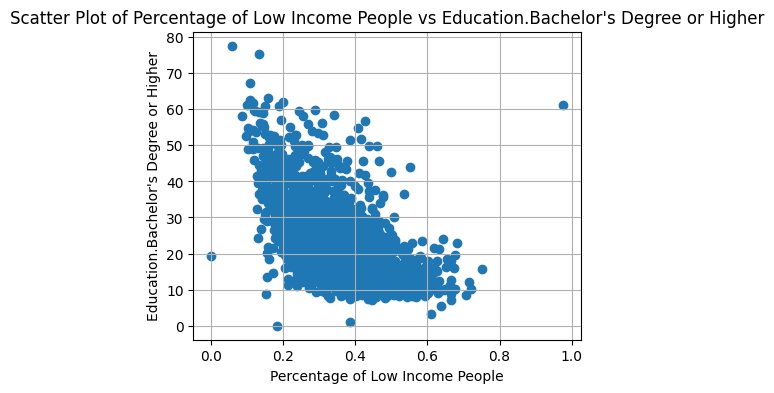

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Education.Bachelor's Degree or Higher")

The plot strongly suggests an inverse relationship between poverty levels and educational attainment (specifically having a Bachelor's degree or higher). Areas with a higher proportion of low-income residents tend to have a lower proportion of residents with a Bachelor's degree or higher, and vice versa.

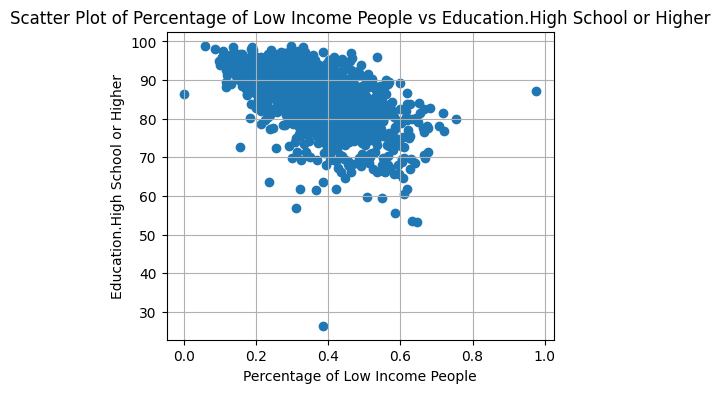

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Education.High School or Higher")

The plot suggests that there's a tendency for areas with a higher proportion of low-income residents to have a slightly lower proportion of residents with at least a high school education. However, high school attainment remains relatively high across a wider range of low-income levels compared to Bachelor's degree attainment.

###Low income vs housing

In [ ]:
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,0.3135,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,0.2905,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,0.5008,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,0.3978,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,0.3605,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


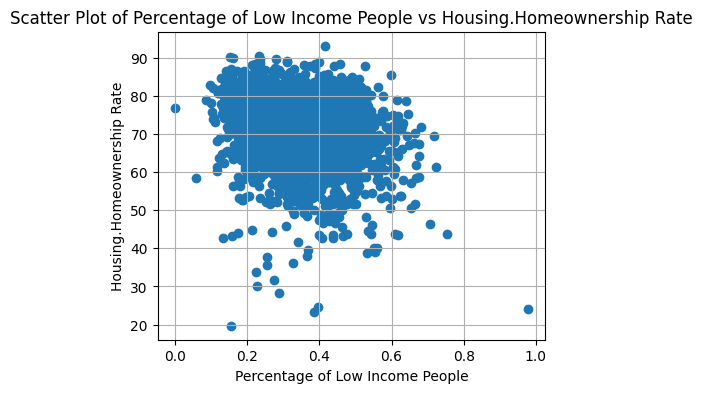

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Housing.Homeownership Rate")

The plot suggests an inverse relationship between poverty levels and homeownership rates. Areas with a higher proportion of low-income residents tend to have a lower proportion of owner-occupied housing units, and vice versa. This makes intuitive sense, as homeownership often requires financial stability.

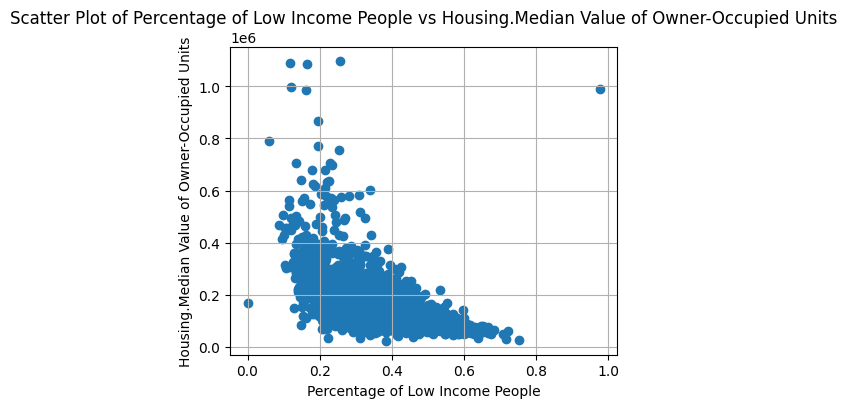

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Housing.Median Value of Owner-Occupied Units")

The plot strongly suggests an inverse relationship between poverty levels and housing values. Areas with a higher proportion of low-income residents tend to have much lower median home values, and areas with a lower proportion of low-income residents tend to have much higher median home values. This is a logical relationship, as income levels directly influence the affordability of housing.

Low income vs income

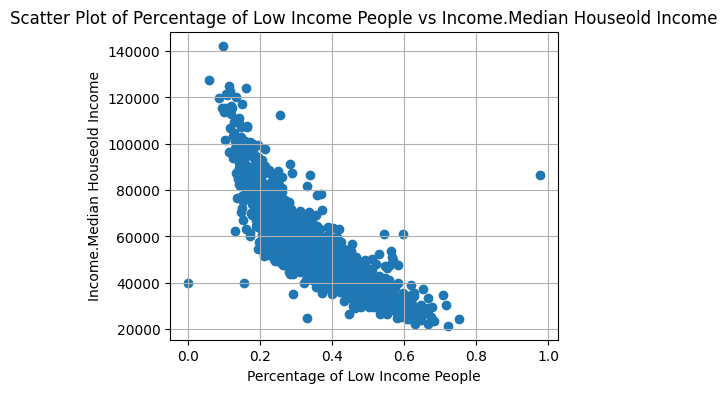

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Income.Median Houseold Income")

The plot strongly suggests an inverse relationship between poverty levels and median household income. Areas with a higher proportion of low-income residents tend to have much lower median household incomes, and areas with a lower proportion of low-income residents tend to have much higher median household incomes. This is a fundamental and expected relationship, as the definition of low income is directly tied to income levels.

###low income vs language

In [ ]:
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total
0,autaugacounty,54571,al,autaugacountyal,15518,49497,0.3135,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949
1,baldwincounty,182265,al,baldwincountyal,48117,165616,0.2905,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732
2,barbourcounty,27457,al,barbourcountyal,11901,23762,0.5008,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687
3,bibbcounty,22915,al,bibbcountyal,8349,20989,0.3978,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310
4,blountcounty,57322,al,blountcountyal,19806,54933,0.3605,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550


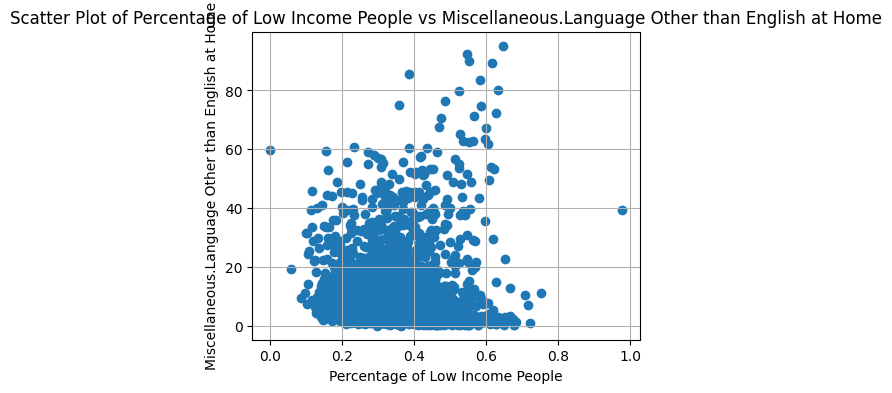

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Miscellaneous.Language Other than English at Home")

The plot suggests that the relationship between poverty levels and the prevalence of languages other than English spoken at home is nuanced. While there are many areas with low poverty and low other-language usage, there are also numerous areas with low to moderate poverty that exhibit significant linguistic diversity. Only at the very highest levels of low income does the percentage of other languages spoken at home seem to generally decrease.

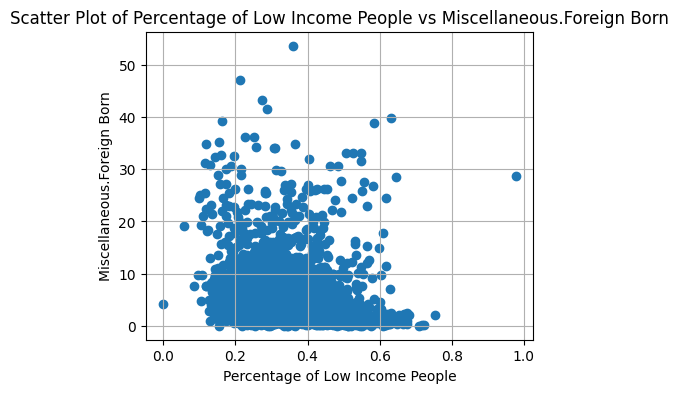

In [ ]:
compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Miscellaneous.Foreign Born")

###low income vs pp sq

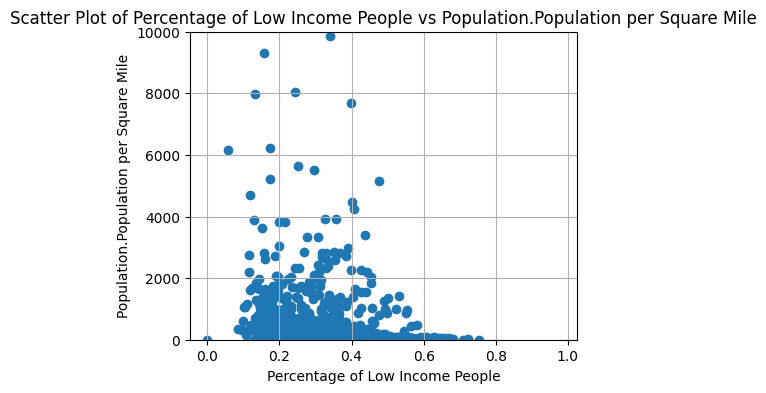

In [ ]:
col1 = 'Percentage of Low Income People'
col2 = 'Population.Population per Square Mile'
plt.figure(figsize=(5, 4))  # Adjust figure size as needed
plt.scatter(df[col1], df[col2])

plt.ylim(0, 10000)  # Set the y-axis to range from 0 to 40

plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.grid(True)
plt.show()

The plot suggests that while densely populated areas can exist with relatively low poverty rates, areas with very high poverty rates are less likely to be very densely populated. However, at lower to moderate poverty levels, population density can vary significantly, indicating that other factors play a strong role in determining how many people live in a given area.

####adding % of minority businesses column

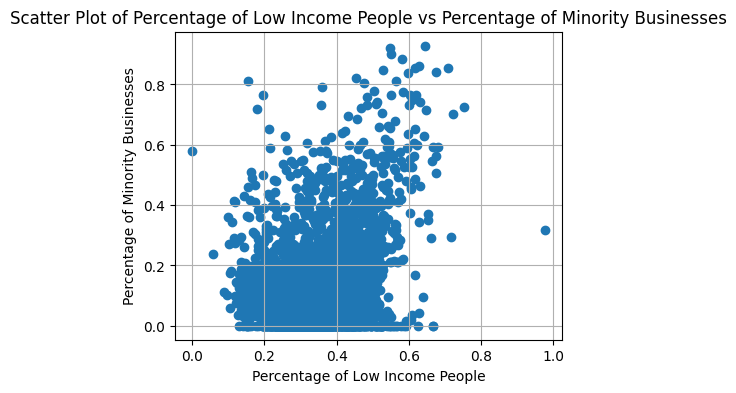

In [ ]:
df["Percentage of Minority Businesses"] = df["Employment.Firms.Minority-Owned"] / df["Employment.Firms.Total"]

compare_2_by_plot_scatter_matrix('Percentage of Low Income People', "Percentage of Minority Businesses")

The plot suggests that there isn't a straightforward, direct link between the overall poverty level of an area and the proportion of businesses owned by minorities. While many areas have low percentages of minority-owned businesses regardless of income levels, areas with moderate poverty show a wide variety in minority business ownership. There's a hint that higher poverty areas might have a slightly higher proportion of minority-owned businesses on average, but this relationship is not strong or consistent.

## Multivariate Analysis

---


*   Explore the relationship between three or more variables
*   Prioritize Based on Bivariate Findings that show clear trends




In [ ]:
df.head()

,County,Population,State,mergedkeycol,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.People.1/2 Mile,Percentage of Low Income People,Education.Bachelor's Degree or Higher,Education.High School or Higher,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.White Alone\t not Hispanic or Latino,Ethnicities.Asian Alone,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Income.Median Houseold Income,Miscellaneous.Foreign Born,Miscellaneous.Language Other than English at Home,Population.Population per Square Mile,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Total,Percentage of Minority Businesses
0,autaugacounty,54571,al,autaugacountyal,15518,49497,0.3135,26.6000,88.5000,20.1000,3.0000,73.8000,1.2000,73.3000,154500.0000,58731,2.3000,4.3000,91.8000,616.0000,2160,2949,0.2089
1,baldwincounty,182265,al,baldwincountyal,48117,165616,0.2905,31.9000,90.8000,8.8000,4.7000,83.2000,1.1000,75.2000,197900.0000,58320,3.7000,5.4000,114.6000,2130.0000,16893,19732,0.1079
2,barbourcounty,27457,al,barbourcountyal,11901,23762,0.5008,11.6000,73.2000,48.2000,4.5000,45.5000,0.5000,60.9000,90700.0000,32525,2.7000,7.1000,31.0000,657.0000,941,1687,0.3894
3,bibbcounty,22915,al,bibbcountyal,8349,20989,0.3978,10.4000,79.1000,21.3000,2.8000,74.4000,0.2000,74.4000,92800.0000,47542,1.5000,2.3000,36.8000,205.0000,1050,1310,0.1565
4,blountcounty,57322,al,blountcountyal,19806,54933,0.3605,13.1000,80.5000,1.7000,9.7000,86.8000,0.3000,78.8000,127800.0000,49358,4.5000,8.2000,88.9000,368.0000,4011,4550,0.0809


###%low income vs degree vs income

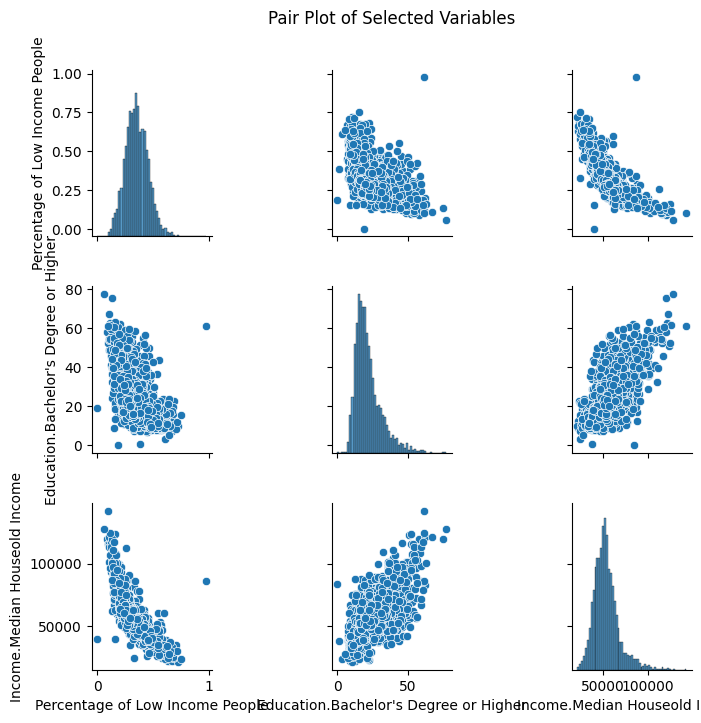

In [ ]:
# Select the columns of interest
subset_df = df[['Percentage of Low Income People', "Education.Bachelor's Degree or Higher", "Income.Median Houseold Income"]]

# Create a pair plot
sns.pairplot(subset_df)
plt.suptitle("Pair Plot of Selected Variables") # Optional title
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=0.3)
plt.show()

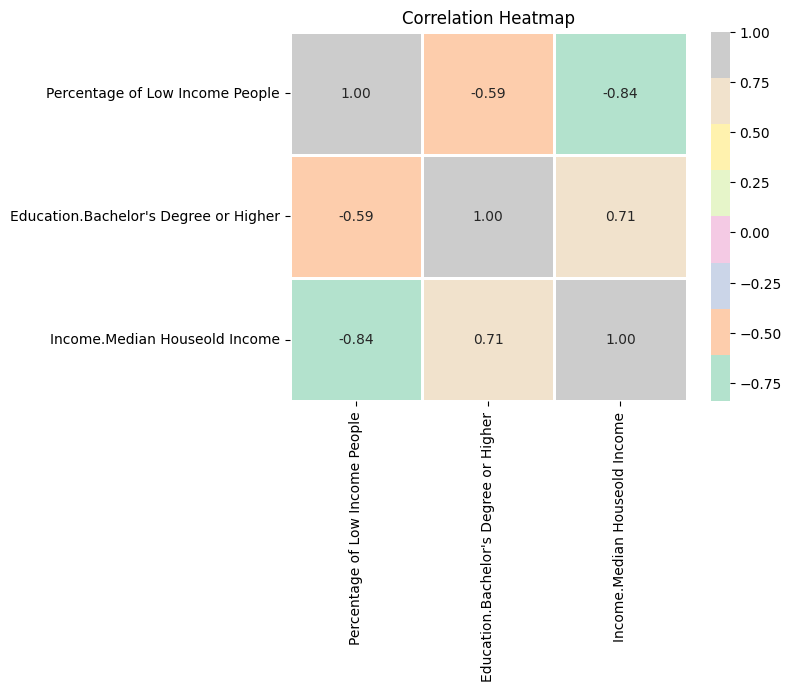

In [ ]:
df_subset = df[['Percentage of Low Income People', "Education.Bachelor's Degree or Higher", "Income.Median Houseold Income"]]

sns.heatmap(df_subset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.

Darker colors signify strong correlation, while light colors represents weaker correlations.
Positive correlation variable move in same directions. As one increases, the other also increases.
Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.

Adding the income specifier to a % of low income and education degree comparison would make the trend more negative

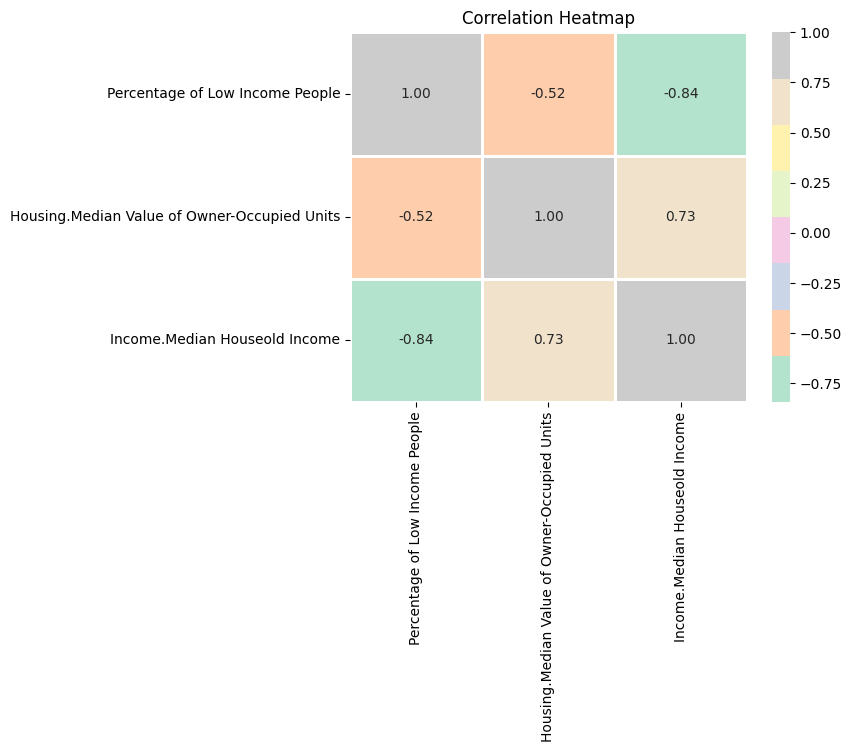

In [ ]:
df_subset_1 = df[['Percentage of Low Income People', "Housing.Median Value of Owner-Occupied Units", "Income.Median Houseold Income"]]

sns.heatmap(df_subset_1.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Education is a stronger relation than housing value


We intend to use these two columns for linear regression model
*   'Percentage of Low Income People'
*   "Income.Median Houseold Income"



In [ ]:
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 10.230608743000005
